In [4]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_toy'
 'chebyshev_linear_regression_toy_uniform_sampling'
 'kernel_linear_regression_toy_basis_4'
 'kernel_linear_regression_toy_basis_4_dim_1'
 'kernel_linear_regression_toy_basis_4_normalized'
 'kernel_linear_regression_toy_basis_4_normalized_x_scale_2'
 'kernel_linear_regression_toy_dim_20_basis_2'
 'kernel_linear_regression_toy_just_basis_4_log'
 'kernel_linear_regression_toy_soemthing_idk?']
                                         run_id                      task  \
4          df404175-d0f4-4ec5-ba94-0f90bb79544d  kernel_linear_regression   
7  chebyshev-take1-bad-combination-distribution  kernel_linear_regression   
1                        basis-4-not-normalized  kernel_linear_regression   
8          add3f196-62dd-4b87-9f5e-8d7ad29cf946  kernel_linear_regression   
6                            basis-4-normalized  kernel_linear_regression   
5                  basis-4-normalized-x-scale-2  kernel_linear_regression   
0         high-dimension-joint-l

run_id                      task  \
4          df404175-d0f4-4ec5-ba94-0f90bb79544d  kernel_linear_regression   
7  chebyshev-take1-bad-combination-distribution  kernel_linear_regression   
1                        basis-4-not-normalized  kernel_linear_regression   
8          add3f196-62dd-4b87-9f5e-8d7ad29cf946  kernel_linear_regression   
6                            basis-4-normalized  kernel_linear_regression   
5                  basis-4-normalized-x-scale-2  kernel_linear_regression   
0         high-dimension-joint-linear-quadratic  kernel_linear_regression   
3          a6c28d4b-4687-4631-9f46-1f5acbe1c18c  kernel_linear_regression   
2          cfecded6-d2ef-467e-8f70-7ac8a0107650  kernel_linear_regression   

         model       kwargs  num_tasks  num_examples  n_dims  n_layer  n_head  \
4  Transformer  basis_dim=4         -1            -1       1       12       8   
7  Transformer  basis_dim=4         -1            -1       1       12       8   
1  Transformer  basis_dim=4         -1            -1       5       12       8   
8  Transformer  basis_dim=4         -1            -1       1       12       8   
6  Transformer  basis_dim=4         -1            -1       5       12       8   
5  Transformer  basis_dim=4         -1            -1       5       12       8   
0  Transformer  basis_dim=2         -1            -1      20       12       8   
3  Transformer  basis_dim=4         -1            -1       5       12       8   
2  Transformer  basis_dim=4         -1            -1       5       12       8   

                                            run_name  
4                    chebyshev_linear_regression_toy  
7   chebyshev_linear_regression_toy_uniform_sampling  
1               kernel_linear_regression_toy_basis_4  
8         kernel_linear_regression_toy_basis_4_dim_1  
6    kernel_linear_regression_toy_basis_4_normalized  
5  kernel_linear_regression_toy_basis_4_normalize...  
0        kernel_linear_regression_toy_dim_20_basis_2  
3      kernel_linear_regression_toy_just_basis_4_log  
2        kernel_linear_regression_toy_soemthing_idk?

In [8]:
task = "kernel_linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "68e58ac0-5791-4317-b3f6-a325b487c0df"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if True:
    metrics = get_run_metrics(run_path)  # these are normally precomputed at the end of training

{'standard': {'task_name': 'kernel_linear_regression', 'n_dims': 1, 'n_points': 11, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard'}}


  0%|          | 0/1 [00:00<?, ?it/s]

TransformerModel(
  (_read_in): Linear(in_features=1, out_features=256, bias=True)
  (_backbone): GPT2Model(
    (wte): Embedding(50257, 256)
    (wpe): Embedding(22, 256)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
        )
        (ln_2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout)

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

tensor([[[-1.2827e-01],
         [-1.2067e-01]],

        [[ 2.3936e-01],
         [-3.1460e-01]],

        [[ 2.7143e-01],
         [-5.1524e-01]],

        [[-8.8621e-01],
         [ 4.6318e-02]],

        [[-3.8677e-01],
         [ 4.2744e-01]],

        [[-4.6763e-01],
         [-1.2396e-01]],

        [[-1.3719e-01],
         [-4.5796e-01]],

        [[ 4.2240e-01],
         [ 3.0383e-02]],

        [[ 8.8399e-02],
         [-8.7516e-01]],

        [[ 3.2304e-02],
         [ 7.3038e-01]],

        [[-7.8800e-01],
         [ 1.3493e-02]],

        [[ 5.8870e-02],
         [-4.0288e-01]],

        [[-2.4260e-01],
         [ 4.2818e-01]],

        [[-3.8110e-01],
         [ 5.4285e-01]],

        [[-1.4873e-01],
         [-8.1980e-01]],

        [[ 2.3106e-01],
         [ 3.9588e-01]],

        [[ 5.8161e-01],
         [-2.9826e-01]],

        [[-1.2002e-01],
         [-1.4997e-01]],

        [[-5.8537e-02],
         [ 8.7588e-01]],

        [[ 5.9963e-01],
         [-2.9619e-01]],



# Plot pre-computed metrics

chebyshev_linear_regression_toy df404175-d0f4-4ec5-ba94-0f90bb79544d
{'standard': {'task_name': 'kernel_linear_regression', 'n_dims': 1, 'n_points': 11, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard'}}


100%|██████████| 1/1 [00:00<00:00, 46091.25it/s]

{'standard': {'gpt2_embd=256_layer=12_head=8': {'mean': [0.25364089012145996, 0.1689964234828949, 0.1004008799791336, 0.04649197310209274, 0.022562112659215927, 0.008188639767467976, 0.005477819591760635, 0.004339972976595163, 0.0030861529521644115, 0.003080951049923897, 0.0017023120308294892], 'std': [0.2527598440647125, 0.23021432757377625, 0.1664951890707016, 0.10905613005161285, 0.0777614489197731, 0.03606913611292839, 0.025092272087931633, 0.032378874719142914, 0.016729408875107765, 0.019965939223766327, 0.013094550929963589], 'bootstrap_low': [0.24135318398475647, 0.1584988683462143, 0.09265168756246567, 0.041429780423641205, 0.019088272005319595, 0.006622920744121075, 0.0043531605042517185, 0.0029256176203489304, 0.002396386582404375, 0.0022232423070818186, 0.0011945714941248298], 'bootstrap_high': [0.2646803855895996, 0.18007145822048187, 0.10820774734020233, 0.05140718072652817, 0.026393074542284012, 0.009877294301986694, 0.006625305861234665, 0.005992469377815723, 0.003935218

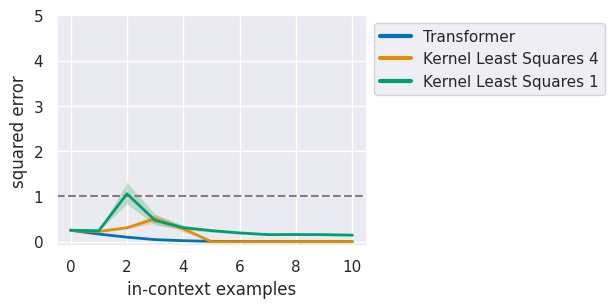

In [10]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
print(models)
print(metrics)
print(metrics)
print(conf)
basic_plot(metrics["standard"], models=models)
plt.show()

In [47]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [36]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [37]:
with torch.no_grad():
    pred = model(xs, ys)

5


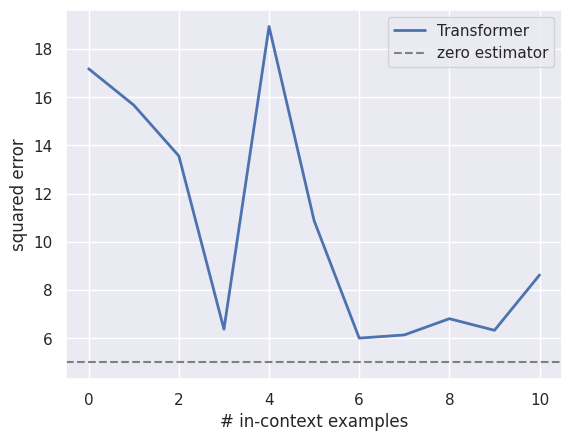

In [42]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "kernel_linear_regression": n_dims,
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]
plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [43]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

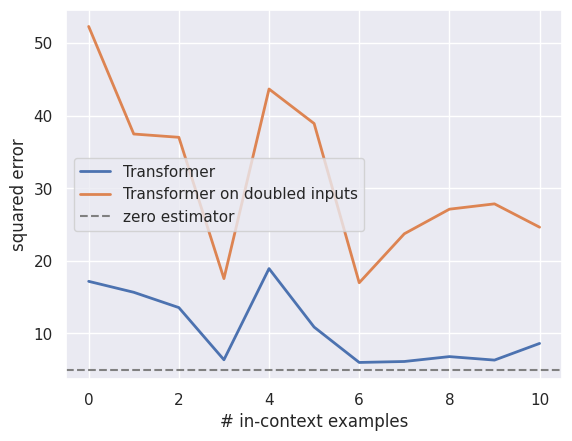

In [44]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.